In [1]:
from ase.io import read
from ase.visualize.plot import plot_atoms
from abtem import Potential
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.append('../')
from DM1dCalc.multislice import multislice

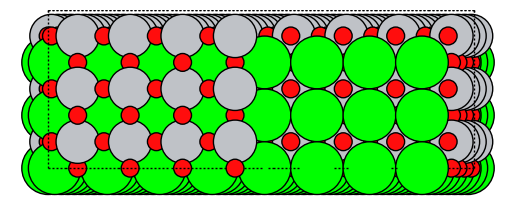

In [2]:
sto_3bc = read('../structures/STO3bc.cif')
sto_3bc = sto_3bc.repeat((1, 3, 1))
plot_atoms(sto_3bc, rotation=('0x, 0y, 0z'), show_unit_cell=True)
plt.axis("off")
plt.show()

In [3]:
energy = 200e3  # in eV
sampling = 0.065  # in Angstrom

potential = Potential(
    sto_3bc,
    sampling=sampling,
    slice_thickness=1,
    projection="finite"
).build().array

In [ ]:
# Example usage
ew_check = multislice(np.array(potential),
                      energy=energy,
                      sampling=sampling,
                      slice_thickness=1,
                      device='cpu')

100%|██████████| 32/32 [00:00<00:00, 458.78it/s]


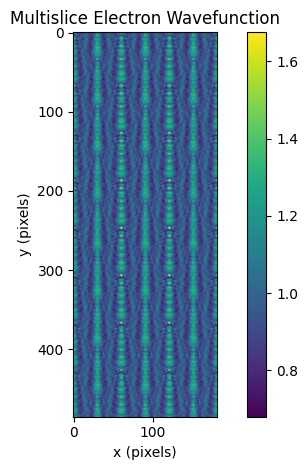

In [5]:
plt.imshow(np.abs(ew_check))
plt.colorbar()
plt.title('Multislice Electron Wavefunction')
plt.xlabel('x (pixels)')
plt.ylabel('y (pixels)')
plt.tight_layout()
plt.show()

One dimensional validity